In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
import matplotlib.pylab as plt
from matplotlib.ticker import StrMethodFormatter

In [3]:
wine_df = pd.read_csv('wine.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
y = titanic_df.pop('Survived').values
X = titanic_df.values
X.shape

KeyError: 'Survived'

In [7]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [8]:
n_reps = 50
folds = 4
est_range = range(2,16)
n_est_dict = {}
for n_est in est_range: 
    scores = []
    for rep in range(n_reps):
        tree_bag = BaggingClassifier(dtree, 
                            n_estimators = n_est,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True)
        scores_tree_bag = cross_val_score(tree_bag, X, y, cv=folds, n_jobs = -1)
        scores.append(scores_tree_bag.mean())
    n_est_dict[n_est]=np.array(scores).mean()

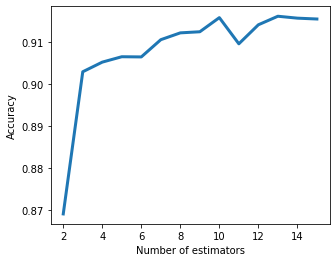

In [9]:
res_list = sorted(n_est_dict.items()) # sorted by key, return a list of tuples
nc, accs = zip(*res_list) # unpack a list of pairs into two tuples
f = plt.figure(figsize=(5,4))

plt.plot(nc, accs, lw = 3)

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
f.savefig('acc-est.pdf')

In [10]:
n_reps = 50
n_est = 10
res_dict = {}
max_s_range = np.arange(0.95,0.4,-0.05)
for max_s in max_s_range:
    scores = []
    for rep in range(n_reps):
        tree_bag = BaggingClassifier(dtree, 
                            n_estimators = n_est,
                            max_samples = max_s,  
                            bootstrap = False)
        scores_tree_bag = cross_val_score(tree_bag, X, y, cv=folds, n_jobs = -1)
        scores.append(scores_tree_bag.mean())
    res_dict[max_s]=np.array(scores).mean()

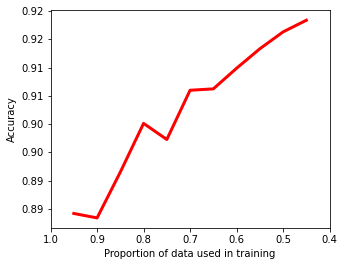

In [11]:
res_list = sorted(res_dict.items())
ns, accs = zip(*res_list) 
f = plt.figure(figsize=(5,4))

plt.plot(ns, accs, lw = 3, color = 'r')
plt.xlim([1, 0.4])
plt.xlabel("Proportion of data used in training")
plt.ylabel("Accuracy")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) 
f.savefig('acc-div.pdf')

In [12]:
N = 1000
data = np.arange(N)
BS = np.random.choice(data, size = N)
BS_unique = set(BS)
len(BS_unique)

625

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
dtree = DecisionTreeClassifier(criterion='entropy')

In [14]:
 def eval_bag_est_range(the_est, n_reps, est_range, folds = 10):
    n_est_dict = {}
    for n_est in est_range: 
        the_bag = BaggingClassifier(the_est, 
                            n_estimators = n_est,
                            max_samples = 1.0,  
                            bootstrap = True)
        bag_cv = cross_validate(the_bag, X, y, n_jobs=-1,
                                cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps)) 
        n_est_dict[n_est]=bag_cv['test_score'].mean()
    return n_est_dict

In [15]:
kNNpipe  = Pipeline(steps=[ ('scaler', StandardScaler()),
                           ('classifier', KNeighborsClassifier(n_neighbors=1))])

NNPipe = Pipeline(steps=[ ('scaler', StandardScaler()),
                           ('classifier', MLPClassifier(solver='lbfgs', alpha=1e-5,
                                                        hidden_layer_sizes=(5, 2)))])

In [16]:
res_NN_bag = eval_bag_est_range(NNPipe, 10, range(2,16))

In [17]:
res_NN_bag

{2: 0.9606209150326798,
 3: 0.9663398692810458,
 4: 0.9740522875816994,
 5: 0.9719934640522875,
 6: 0.9769281045751634,
 7: 0.9740849673202615,
 8: 0.9769281045751634,
 9: 0.9758496732026144,
 10: 0.9752614379084967,
 11: 0.9741830065359476,
 12: 0.9814379084967321,
 13: 0.9815359477124184,
 14: 0.9799346405228759,
 15: 0.9756209150326797}

In [18]:
res_kNN_bag  = eval_bag_est_range(kNNpipe, 10, range(2,16))

In [19]:
res_kNN_bag

{2: 0.9413725490196079,
 3: 0.9508496732026144,
 4: 0.9498692810457517,
 5: 0.953954248366013,
 6: 0.9532352941176471,
 7: 0.954967320261438,
 8: 0.9552614379084967,
 9: 0.9541176470588236,
 10: 0.9545098039215687,
 11: 0.9537254901960784,
 12: 0.9578758169934641,
 13: 0.9527777777777778,
 14: 0.9509150326797385,
 15: 0.9562745098039216}

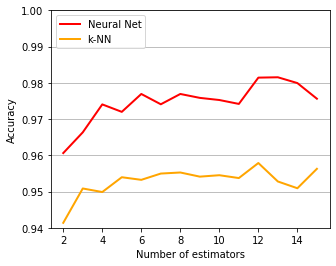

In [20]:
kNN_list = sorted(res_kNN_bag.items()) 
nc, kNN_accs = zip(*kNN_list) 
NN_list = sorted(res_NN_bag.items())
nc, NN_accs = zip(*NN_list) 

f = plt.figure(figsize=(5,4))

plt.plot(nc, NN_accs, lw = 2, color = 'r', label = 'Neural Net')
plt.plot(nc, kNN_accs, lw = 2, color = 'orange', label = 'k-NN')

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.ylim([0.94,1])
plt.legend(loc = 'upper left')
plt.grid(axis = 'y')
f.savefig('bag-est-plot.pdf')

In [21]:
clf_dict = {}
clf_dict['Tree'] = DecisionTreeClassifier(max_leaf_nodes = 6)
clf_dict['Neural Net'] = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                                       hidden_layer_sizes=(5, 2))
clf_dict['Logistic'] = LogisticRegression(solver = 'lbfgs')
clf_dict['k-NN'] = KNeighborsClassifier(n_neighbors=1)
clf_dict['Bayes'] = GaussianNB()

In [22]:
clf_acc = {}
bag_acc = {}
folds, n_reps = 10,10
n_est = 10
v = 0
for c_name in clf_dict.keys():
    pipe  = Pipeline(steps=[ ('scaler', StandardScaler()),
                           ('classifier', clf_dict[c_name])])
    clf_cv = cross_validate(pipe, X, y, n_jobs=-1,
                                    cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))

    the_bag = BaggingClassifier(pipe, 
                            n_estimators = n_est,
                            max_samples = 1.0, 
                            bootstrap = True)
    bag_cv = cross_validate(the_bag, X, y, n_jobs=-1,
                                    cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))
    
    clf_acc[c_name] = clf_cv['test_score'].mean()
    bag_acc[c_name] = bag_cv['test_score'].mean()
    print("Mean for {:s} {:.2f}".format(c_name, clf_cv['test_score'].mean()))
    print("Mean for {:s} bag {:.2f}".format(c_name, bag_cv['test_score'].mean()))

Mean for Tree 0.89
Mean for Tree bag 0.95
Mean for Neural Net 0.94
Mean for Neural Net bag 0.98
Mean for Logistic 0.98
Mean for Logistic bag 0.98
Mean for k-NN 0.96
Mean for k-NN bag 0.96
Mean for Bayes 0.98
Mean for Bayes bag 0.98


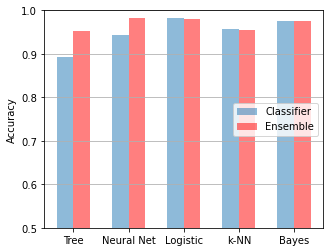

In [23]:
names = clf_dict.keys()
y_pos = np.arange(len(names))
f = plt.figure(figsize=(5,4))
plt.bar(y_pos-0.15, clf_acc.values(), align='center', width = 0.3, alpha=0.5, 
        label = "Classifier")
plt.bar(y_pos+0.15, bag_acc.values(), align='center', color = 'r', width = 0.3, alpha=0.5,
       label = "Ensemble")
plt.xticks(y_pos, names)
plt.ylabel('Accuracy')
#plt.xlabel(x_lab)
#plt.title(title)
plt.ylim((0.5,1))
plt.grid(axis = 'y')
plt.legend(loc = 'center right')
plt.show()
f.savefig('bag-est-bar.pdf')

In [24]:
def do_colourmap (matrix, names, title = ' ', **kwargs):
    if 'vmx' in kwargs:    
        vmax_val = kwargs['vmx']
    else: vmax_val = matrix.max()

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(matrix, cmap = 'gray', vmax= vmax_val)
   
    ax.set_xticks(np.arange(len(names)))
    ax.set_yticks(np.arange(len(names)))
    
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)

   
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

    
    for i in range(len(names)):
        for j in range(len(names)):
            text = ax.text(j, i, round(matrix[i, j],2), size = 14,
                           ha="center", va="center", color="orange")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()
    return fig

In [25]:
X_trainR, X_testR, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trainR)
X_test = scaler.transform(X_testR)
X_train.shape, X_test.shape

((89, 13), (89, 13))

In [26]:
stab_dict = {}

NNPipe = Pipeline(steps=[ ('scaler', StandardScaler()),
                           ('classifier', MLPClassifier(solver='lbfgs', alpha=1e-5,
                                                        hidden_layer_sizes=(5, 2)
                                                       ))])
kNNpipe  = Pipeline(steps=[ ('scaler', StandardScaler()),
                           ('classifier', KNeighborsClassifier(n_neighbors=1))])

stab_dict['Neural Net'] = BaggingClassifier(NNPipe,
                            n_estimators = n_est,
                            max_samples = 1.0, 
                            bootstrap = True)
stab_dict['kNN'] = BaggingClassifier(kNNpipe,
                            n_estimators = n_est,
                            max_samples = 1.0,
                            bootstrap = True)

In [27]:
from statistics import mode

def plain_dis(l1, l2):
    m = len(l1)
    count = 0
    for i, j in zip(l1,l2):
        if i != j:
            count += 1
    return count/m


def get_consensus_prediction (data_frame, columns):
    res_data_frame = data_frame[columns]
    consensus = []
    for row in res_data_frame.iterrows():
        consensus.append(mode(row[1]))
    return 

In [28]:
dist_arr_dict = {}
n_est = 5

bag_names = []
for i in range(n_est):
    bag_names.append('Est '+ str(i+1))

clfs = ['Neural Net', 'kNN']
for clf_name in clfs:
    the_bag = stab_dict[clf_name]
    bag_ests = the_bag.fit(X_train,y_train).estimators_
    bag_df = pd.DataFrame() 
    
    for i, est in enumerate(bag_ests):
        y_preds = est.predict(X_test)
        bag_df['Est '+ str(i+1)]=y_preds
    bag_df['Consensus'] = get_consensus_prediction(bag_df,bag_df.columns)
    bag_df['Actual'] = y_test
    bag_dis_arr = np.zeros((n_est,n_est))
    for i_ind,i in enumerate(bag_names):
        for j_ind,j in enumerate(bag_names):
            bag_dis_arr[i_ind,j_ind] = plain_dis(bag_df[i],bag_df[j])
    dist_arr_dict[clf_name] = bag_dis_arr

In [29]:
print('Max difference in NN Ensemble: %4.3f' % (dist_arr_dict['Neural Net'].max()))
print('Max difference in kNN Ensemble: %4.3f' % (dist_arr_dict['kNN'].max()))
maxv = max(dist_arr_dict['Neural Net'].max(),dist_arr_dict['kNN'].max())
print('Overall max is: %4.3f' % maxv)

Max difference in NN Ensemble: 0.124
Max difference in kNN Ensemble: 0.056
Overall max is: 0.124


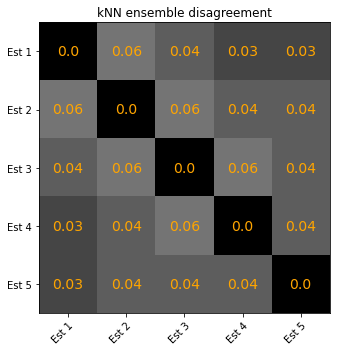

In [30]:
f = do_colourmap(dist_arr_dict['kNN'], bag_names, 
             title = 'kNN ensemble disagreement', vmx = maxv)
f.savefig('kNN-dis-arr.pdf')

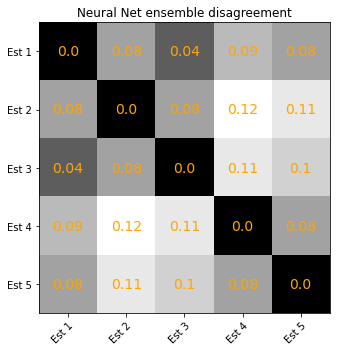

In [31]:
f = do_colourmap(dist_arr_dict['Neural Net'], bag_names, 
             title = 'Neural Net ensemble disagreement', vmx = maxv)
f.savefig('NN-dis-arr.pdf')

In [32]:
n_est = 20
kNNpipe  = Pipeline(steps=[ ('scaler', StandardScaler()),
                           ('classifier', KNeighborsClassifier(n_neighbors=1))])

kNNbag = BaggingClassifier(kNNpipe,
                            n_estimators = n_est,
                            max_samples = 1.0, 
                            bootstrap = True)

random_SS_kNN = BaggingClassifier(kNNpipe, 
                            n_estimators = n_est,
                            max_samples=1.0, bootstrap = False,
                            max_features=0.5)

In [33]:
kNNbag_cv = cross_validate(kNNbag, X, y, n_jobs=-1,
                        cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))

In [34]:
kNNbag_cv['test_score'].mean()

0.9550980392156864

In [35]:
rSS_cv = cross_validate(random_SS_kNN, X, y, n_jobs=-1,
                        cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))

In [36]:
rSS_cv['test_score'].mean()

0.9741830065359477

In [37]:
clf_acc = {}
bag_acc = {}
rs_acc = {}
folds, n_reps = 10,10
n_est = 20
v = 0
clfs = ['Neural Net', 'k-NN']
for c_name in clfs:
    pipe  = Pipeline(steps=[ ('scaler', StandardScaler()),
                           ('classifier', clf_dict[c_name])])
    clf_cv = cross_validate(pipe, X, y, n_jobs=-1,
                                    cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))

    the_bag = BaggingClassifier(pipe, 
                            n_estimators = n_est,
                            max_samples = 1.0, 
                            bootstrap = True)
    bag_cv = cross_validate(the_bag, X, y, n_jobs=-1,
                                    cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))
    random_SS = BaggingClassifier(pipe, 
                            n_estimators = n_est,
                            max_samples=1.0, bootstrap = False,
                            max_features=0.5)
    RS_cv = cross_validate(random_SS, X, y, n_jobs=-1,
                                    cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))
   
    clf_acc[c_name] = clf_cv['test_score'].mean()
    bag_acc[c_name] = bag_cv['test_score'].mean()
    rs_acc[c_name] = RS_cv['test_score'].mean()

    print("Mean for {:s} {:.2f}".format(c_name, clf_cv['test_score'].mean()))
    print("Mean for {:s} bag {:.2f}".format(c_name, bag_cv['test_score'].mean()))
    print("Mean for {:s} RS {:.2f}".format(c_name, RS_cv['test_score'].mean()))

Mean for Neural Net 0.92
Mean for Neural Net bag 0.98
Mean for Neural Net RS 0.97
Mean for k-NN 0.95
Mean for k-NN bag 0.95
Mean for k-NN RS 0.97


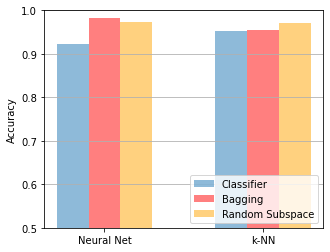

In [38]:
names = clfs
y_pos = np.arange(len(names))
f = plt.figure(figsize=(5,4))
plt.bar(y_pos-0.2, clf_acc.values(), align='center', width = 0.2, alpha=0.5, 
        label = "Classifier")
plt.bar(y_pos, bag_acc.values(), align='center', color = 'r', width = 0.2, alpha=0.5,
       label = "Bagging")
plt.bar(y_pos+0.2, rs_acc.values(), align='center', color = 'orange', width = 0.2, alpha=0.5,
       label = "Random Subspace")


plt.xticks(y_pos, names)
plt.ylabel('Accuracy')

plt.ylim((0.5,1))
plt.grid(axis = 'y')
plt.legend(loc = 'lower right')
plt.show()
f.savefig('RandomSS-bar.pdf')